<a href="https://colab.research.google.com/github/Baiqsafiravinili/Tubes-Sko/blob/main/TUBES_SKO_Baiq_Safira_Vinili_Kurnia_1101184007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS BESAR SKO**

NAMA   : BAIQ SAFIRA VINILI KURNIA

NIM    : 1101184007

KELAS : TT-42-07

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

**KETERANGAN**

Diketahui sebuah Gedung di daerah Senggigi, Lombok memiliki jarak dari sentral STO Mataram sejauh 16 Km, dan gedung tersebut memiliki 20 Lantai. Lantai yang di hitung adalah lantai 12, Untuk jarak lanjutannya menggunakan 4 meter, sehingga jumlah lantai yang dipakai di kali 4 meter sehingga jarak yang di tempuh sampai ke Roset dilantai adalah ditambah 48 meter.Maka total jaraknya yaitu 16.048 Km atau 16.048 meter.

Panjang gelombang yang diketahui yang dipakai adalah 1490 nm dengan redaman 0,28 db/Km

4 Connector, 2 Splitter, dan 8 Splicer.

Untuk Splitter, masing-masing memiliki redaman. Splitter pertama memiliki redaman sebesar 16.5 dB (Splitter 1:32) dan yang kedua memiliki redaman sebesar 19,28 dB (Splitter 1:64).

Untuk Splicer nya memiliki redaman sebesar 0,1 dB

Angka lain berhubungan dengan ketetapan yang diambil dari jurnal atau paper yang dijadikan referensi.

**PARAMETER**

In [3]:
#---Kabel FO G.652 - SI-SM
L=154 #km
Hspl=2 #km
disp_M= 6e-12 #s/km.nm
alpha_f=0.2 #dB/km

In [14]:
#PARAMETER UNTUK DAYA TERIMA
j = np.arange(1.048,16.048,1)
loss_fiber = 0.28 * j
ptrans = 4

#Splicer
splicer = 8
loss_splicer = 0.1 * 8

#Connector
connector = 4
loss_connector = 0.3 * 4

#Splitter
splitter1 = 16.5
splitter2 = 19.28
loss_splitter = 16.5 + 19.28

In [15]:
#PARAMETER UNTUK SIGNAL TO NOISE RATIO (SNR)
responsivitas = 0.85
dtsinyal = -0.23
loss_margin = 3
muatan = 1.6*10**-19
arusgelap = 2*10**-7
BW = 8*10**9
noise_figure = 1
kboltzman = 1.38*10**-23
tmp = 290
RL = 50 

In [16]:
#PENGKONVERSIAN
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

**ANALISIS (FUNGSI & GRAFIK)**

In [17]:
#FUNGSI DAYA TERIMA
def dayaterima(ptrans,j,loss_fiber,splicer,loss_splicer,connector,loss_connector,loss_splitter,loss_margin):
  RT = loss_fiber + loss_splicer + loss_connector + loss_splitter + loss_margin
  preceive = ptrans - RT
  return preceive
preceive = dayaterima(ptrans,j,loss_fiber,splicer,loss_splicer,connector,loss_connector,loss_splitter,loss_margin)
print ("Daya Terima =",preceive)

Daya Terima = [-37.07344 -37.35344 -37.63344 -37.91344 -38.19344 -38.47344 -38.75344
 -39.03344 -39.31344 -39.59344 -39.87344 -40.15344 -40.43344 -40.71344
 -40.99344]


SNR = [27.5913928 27.0313928 26.4713928 25.9113928 25.3513928 24.7913928
 24.2313928 23.6713928 23.1113928 22.5513928 21.9913928 21.4313928
 20.8713928 20.3113928 19.7513928]


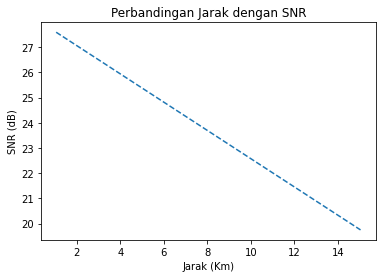

In [18]:
#FUNGSI SIGNAL NOISE TO RATIO

#Arus primer
def arusprimer(preceive):
  preceive_num = LtN(preceive)
  iprimer = preceive_num * responsivitas
  return iprimer
iprimer = arusprimer(preceive)

#BDC
def bdc(muatan,arusgelap,BW,dtsinyal,noise_figure):
  BDC = 2*muatan*arusgelap*BW*dtsinyal*dtsinyal*noise_figure
  return BDC
BDC = bdc(muatan,arusgelap,BW,dtsinyal,noise_figure)

#Shot Noise
def shotnoise(muatan,arusgelap,BW,dtsinyal,noise_figure):
  sn = 2*muatan*arusgelap*BW*dtsinyal*dtsinyal*noise_figure
  return sn
sn = shotnoise(muatan,arusgelap,BW,dtsinyal,noise_figure)

#Noise Thermal
def noisethermal(kboltzman,tmp,BW,RL):
  nt = (4*kboltzman*tmp*BW)/RL
  return nt
nt = noisethermal(kboltzman,tmp,BW,RL)

#SNR (Signal Noise to Ratio)
def snr(BDC,sn,nt,dtsinyal,iprimer):
  SNR = ((iprimer)**2 * dtsinyal**2)/(BDC + sn + nt)
  signr = NtL(SNR) 
  return signr
signr = snr(BDC,sn,nt,dtsinyal,iprimer)
print("SNR =",signr)

#GRAFIK SIGNAL NOISE TO RATIO (SNR)
def grafik_snr():
  plt.figure()
  plt.plot(j,signr,'--')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

grafik_snr()

Q-Faktor = [23.96456996 22.46827031 21.0653966  19.75011552 18.51695794 17.36079625
 16.27682297 15.26053081 14.3076939  13.4143502  12.5767851  11.79151588
 11.05527729 10.36500796  9.71783767]


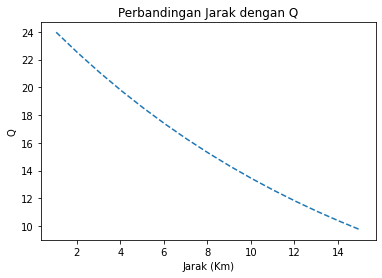

In [19]:
#FUNGSI Q-FAKTOR
def qfaktor(signr):
  qf = 10**(signr/20)
  return qf
QF = qfaktor(signr)
print("Q-Faktor =",QF)

#GRAFIK Q-FAKTOR
def grafik_Q():
  plt.figure()
  plt.plot(j,QF,'--')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

grafik_Q()

BER = [3.26247293e-127 4.24993149e-112 8.28036752e-099 4.01193712e-087
 7.55765848e-077 8.19898568e-068 7.23508594e-060 7.03502799e-053
 9.84251761e-047 2.50510331e-041 1.42548325e-036 2.17380969e-032
 1.04180899e-028 1.80499651e-025 1.27862634e-022]


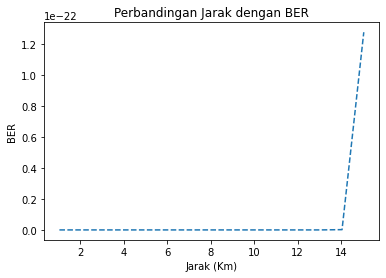

In [20]:
#FUNGSI BER
def ber(QF):
  phi = 3.14159
  BER = (1/(QF*np.sqrt(2*phi)))*(np.exp(-QF**2/2))
  return BER
BER = ber(QF)
print("BER =",BER)

#GRAFIK BER
def grafik_BER():
  plt.figure()
  plt.plot(j,BER,'--')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_BER()

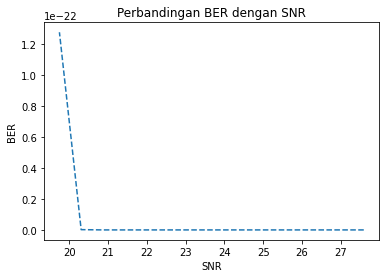

In [21]:
def grafik_perbandingan():
  plt.figure()
  plt.plot(signr,BER,'--')
  plt.title('Perbandingan BER dengan SNR')
  plt.xlabel('SNR')
  plt.ylabel('BER')
  plt.show()

grafik_perbandingan()